## Notebook to create raster masks from polygons
Needed for semantic segmentation of raster images. 

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os, sys
sys.path.append('../scripts/')
import numpy as np
import matplotlib.pyplot as plt
import rasterio, rasterio.plot
import xarray as xr
import rioxarray as rxr
from tqdm import tqdm
import pandas as pd
import time, datetime, json
import geopandas as gpd
import loadpaths
import land_cover_analysis as lca
import land_cover_visualisation as lcv
import land_cover_models as lcm
import create_patches_from_polygons_data
from torch.utils.data import TensorDataset, DataLoader

path_dict = loadpaths.loadpaths()

In [27]:
eval_patch_outlines = lca.load_pols('../content/evaluation_sample_50tiles/eval_patch_grid_annotations/eval_patch_grid_annotations.shp')
eval_patch_outlines = eval_patch_outlines[np.logical_or(eval_patch_outlines['RAND_ANNOT'] == 1, 
                                                        eval_patch_outlines['SEL_ANNOT'] == 1)]
eval_patch_outlines

,RAND_ANNOT,SEL_ANNOT,Class_low,tile_i,tile_patch,patch_i,geometry
0,1,0,0,SE0503,SE0503_p0,0,"POLYGON ((405064.003 403999.995, 405064.003 40..."
29,1,0,0,SE0503,SE0503_p211,211,"POLYGON ((405128.003 403103.995, 405128.003 40..."
53,1,0,0,SE0503,SE0503_p123,123,"POLYGON ((405256.003 403487.995, 405256.003 40..."
81,1,0,0,SE0503,SE0503_p95,95,"POLYGON ((405384.003 403615.995, 405384.003 40..."
93,1,0,0,SE0503,SE0503_p51,51,"POLYGON ((405448.003 403807.995, 405448.003 40..."
...,...,...,...,...,...,...,...
11213,1,0,0,SK2777,SK2777_p132,132,"POLYGON ((427832.003 377487.998, 427832.003 37..."
11236,1,0,0,SK2777,SK2777_p29,29,"POLYGON ((427960.003 377935.998, 427960.003 37..."
11246,1,0,0,SK2777,SK2777_p179,179,"POLYGON ((427960.003 377295.998, 427960.003 37..."
11250,0,1,0,SK2196,SK2196_p204,204,"POLYGON ((421618.322 396167.999, 421635.430 39..."


In [28]:
create_patches_from_polygons_data.main(df_patches_selected=eval_patch_outlines)

Geometry Ring Self-intersection[407495.557080073 405488.00284208] for inds [1726]
Attempting to make valid
Done

Loaded landcover polygons:

adding scrub
adding wetland
adding transport
Classes not mapped: ['C' 'H' 'F' 'G' 'cD1']

Creating and exporting tif masks:


100%|██████████| 50/50 [00:02<00:00, 23.10it/s]


0 tiles were empty: []


 42%|████▏     | 21/50 [01:11<01:42,  3.53s/it]

100%|██████████| 50/50 [02:46<00:00,  3.32s/it]



Creating and exporting patches:
Found 50 images and 50 masks
['/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/12.5cm Aerial Photo/117574-1_RGB_29_Shape/SK0554.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/12.5cm Aerial Photo/117574-1_RGB_40_Shape/SK1798.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/12.5cm Aerial Photo/117574-1_RGB_50_Shape/SK0686.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/12.5cm Aerial Photo/117574-1_RGB_4_Shape/SK2196.tif']
Starting patches save loop


15it [00:03,  4.24it/s]

Patch (182, 'SK1998_p182') is empty, not saving
Patch (197, 'SK1998_p197') is empty, not saving


45it [00:10,  4.57it/s]

Patch (90, 'SK1992_p90') is empty, not saving


50it [00:11,  4.27it/s]

In [5]:
LCU = lcm.load_model(filename='LCU_2023-03-14-1827.data')
LCU.description

Loaded LCU_2023-03-14-1827
loss_function is cross_entropy
n_max_epochs is 30
LandCoverUNet class using CrossEntropyLoss()
D class training using EVAL data. cross_entropy resnet 30 epochs


'LandCoverUNet class using CrossEntropyLoss()\nD class training using EVAL data. cross_entropy resnet 30 epochs'

In [4]:
df_eval = lca.load_pols('../content/evaluation_polygons/landscape_character_2022_detailed_CFGH-override/landscape_character_2022_detailed_CFGH-override.shp')
df_eval['area'] = df_eval['geometry'].area
df_eval.groupby('Class_low').sum()['area']

Class_low
0      4.036372e+07
C      1.497746e+05
C1     1.050174e+06
C2     5.305792e+05
C3     7.810807e+03
C4     2.262873e+04
C4a    4.379195e+04
C4b    3.320603e+03
C4c    6.037541e+03
C5     3.691567e+05
D1     2.543536e+05
D2b    1.344458e+02
D2d    2.839452e+05
D3     5.774055e+04
D6b    3.210444e+04
D6c    1.234462e+05
D7a    2.948657e+03
E2a    3.271700e+06
E2b    9.751844e+05
F      5.438268e+02
F2     2.869339e+05
F3a    1.253995e+05
F3d    1.554619e+05
G      1.021751e+03
G2     3.525916e+04
H      2.986776e+05
H1a    4.910552e+05
H1b    6.005652e+05
H2a    5.394603e+05
H3a    2.383638e+04
H3b    1.215810e+05
Name: area, dtype: float64

In [4]:
df_hab = lca.load_pols('../content/habitat_data_annotations/habitat_data_annotations.shp')
df_hab = df_hab[df_hab['SEL_TRAIN'] == 1]
df_hab.head()

,Year,UK_BAP,source,Class_low,SEL_TRAIN,area,geometry
2315,1998,Lowland Dry Acid Grassland,"Habitats - Priority, Peak District National Pa...",D2a,1,282798.652,"POLYGON ((410762.190 385648.120, 410767.003 38..."
3679,2013,"Upland Flushes, Fens & Swamps","Habitats - Priority, Peak District National Pa...",F3d,1,2286.969,"POLYGON ((396891.158 383009.654, 396901.555 38..."
3813,2013,"Upland Flushes, Fens & Swamps","Habitats - Priority, Peak District National Pa...",F3d,1,4907.303,"POLYGON ((396826.492 382989.450, 396830.533 38..."
4472,2013,Purple Moor Grass & Rush Pasture,"Habitats - Priority, Peak District National Pa...",F3d,1,46035.177,"POLYGON ((402188.973 360251.590, 402250.470 36..."
10449,1998,Purple Moor Grass & Rush Pasture,"Habitats - Priority, Peak District National Pa...",F3d,1,149451.124,"POLYGON ((426631.780 385085.273, 426637.700 38..."


In [4]:
tmp = create_patches_from_polygons_data.main(
    path_image_tile_tifs = '/media/data-hdd/gis_pd/all_pd_tiles/',
    path_tile_outline_shp = path_dict['landscape_character_grid_path'],
    save_dir_mask_tifs = '/home/tplas/data/gis/habitat_training/tile_masks_hab/',
    path_lc = None,
    df_lc=df_hab,
    description_df_lc_for_metadata='Habitat data selected from traingin 2023-03-09',
    dir_im_save_patches = '/home/tplas/data/gis/habitat_training/images/',  # where to save patches 
    dir_mask_save_patches = '/home/tplas/data/gis/habitat_training/masks_hab/',
    create_patches = True,
    save_im_patches = True,
    tif_ims_in_subdirs = True,  # True if tif images are in subdirectories of path_image_tile_tifs
    create_metadata_patches = True,
    discard_empty_patches = True, # whether to discard patches that do not contain any landcover class (ie only NO CLASS)
    suffix_name = '_lc_hab_mask',
    col_name_low_level_index = None,  # if None, will be created
    col_name_low_level_name = 'Class_low'
)

NameError: name 'df_hab' is not defined

In [28]:
train_ds = lcm.DataSetPatches(im_dir='/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/images/', 
                              mask_dir='/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/masks_2022_detailed/', 
                            path_mapping_dict='../content/label_mapping_dicts/label_mapping_dict__D_subclasses_only__2023-03-10-1154.pkl',
                            relabel_masks=True, shuffle_order_patches=False,
                            mask_suffix='_lc_2022_detailed.npy',
                            random_transform_data=False)

Patches sorted by tile/patch order
Loaded 497 patches
Loaded label_mapping_dict__D_subclasses_only__2023-03-10-1154.pkl to map labels


In [29]:
train_ds.remove_no_class_patches()

100%|██████████| 497/497 [00:00<00:00, 529.93it/s]

Removed 251 patches with no class


In [15]:
# train_ds.dict_mapping['dict_new_names']

Length of dataset: 246
(3, 512, 512) <class 'numpy.ndarray'>
(3, 512, 512) <class 'numpy.ndarray'>
(3, 512, 512) <class 'numpy.ndarray'>
(3, 512, 512) <class 'numpy.ndarray'>


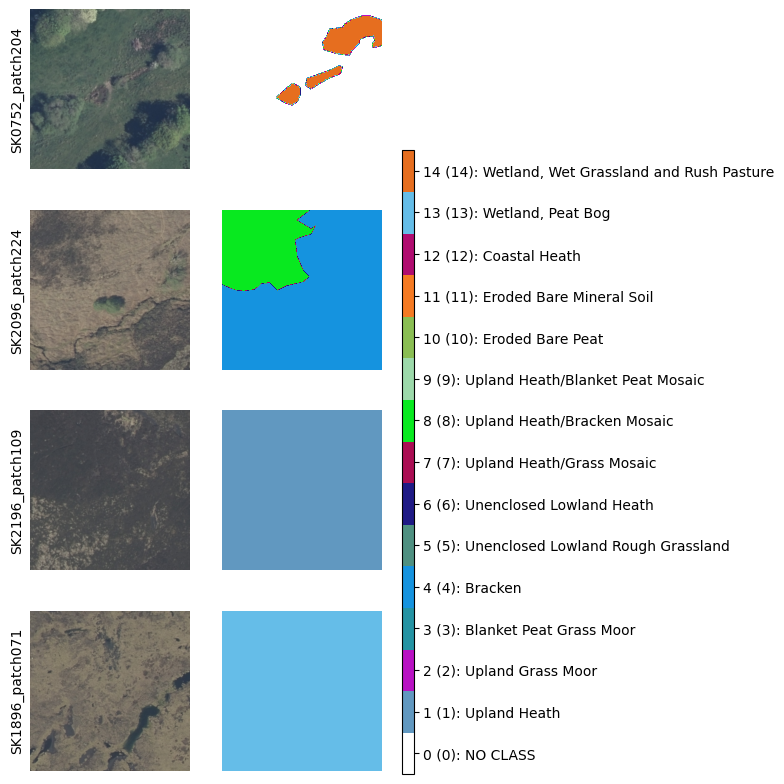

In [31]:
print(f'Length of dataset: {len(train_ds)}')

## Example patches: 
# inds_examples = [0, 1, 2, 3]
inds_examples = np.random.choice(len(train_ds), 4, replace=False)
n_ex = len(inds_examples)

## Create figure layout:
fig = plt.figure(constrained_layout=False, figsize=(4, 8))
gs_ims = fig.add_gridspec(len(inds_examples), 2, top=0.98, 
                        bottom=0.02, left=0.02, right=0.9)
gs_cbar = fig.add_gridspec(1, 1, top=0.8, bottom=0.02, 
                            left=0.95, right=0.98)
ax_cbar = fig.add_subplot(gs_cbar[0, 0])

## Plot each image & mask of patches:
for irow, idx in enumerate(inds_examples):
    ## retrieve data, mask is remapped
    im, mask = train_ds[idx] 
    patch_name = train_ds.df_patches.iloc[idx]['patch_name']

    ## Create axes:
    ax_im = fig.add_subplot(gs_ims[irow, 0])
    ax_mask = fig.add_subplot(gs_ims[irow, 1])

    ## Use land cover visualisation functions to plot:
    lcv.plot_image_simple(im=im.numpy() / 255, ax=ax_im)
    lcv.plot_landcover_image(im=mask.numpy(), ax=ax_mask, 
            lc_class_name_list=train_ds.class_name_list, 
            unique_labels_array=train_ds.unique_labels_arr,
            plot_colorbar=True if irow == n_ex - 1 else False,
            cax=ax_cbar)
    ax_im.set_ylabel(patch_name)

## Tmp fix:

In [19]:
df_tile_outlines = lca.load_pols('../content/evaluation_sample_50tiles/evaluation_sample_50tiles.shp')
pol_outline = df_tile_outlines[df_tile_outlines['PLAN_NO'] == 'SK1357'].iloc[0]['geometry']
eval_patch_outlines = lca.load_pols('../content/evaluation_sample_50tiles/eval_patch_grid_annotations/eval_patch_grid_annotations.shp')

In [20]:
df_main = lca.load_pols('../content/evaluation_polygons/landscape_character_2022_FGH-override/landscape_character_2022_FGH-override.shp')
df_detailed = lca.load_pols('../content/evaluation_polygons/landscape_character_2022_detailed_CFGH-override/landscape_character_2022_detailed_CFGH-override.shp')


In [21]:
print(f'{eval_patch_outlines["SEL_ANNOT"].sum()} manually-selected patches of {len(eval_patch_outlines)} patches have been annotated')
print(f'{eval_patch_outlines["RAND_ANNOT"].sum()} randomly-selected of {len(eval_patch_outlines)} patches have been annotated')


192 manually-selected patches of 11252 patches have been annotated
450 randomly-selected of 11252 patches have been annotated


In [22]:
df_detailed = lca.test_validity_geometry_column(df_detailed)


Geometry Ring Self-intersection[407495.557080073 405488.00284208] for inds [1726]
Attempting to make valid
Done


In [23]:
df_detailed = df_detailed[df_detailed['Class_low'] != '0']

In [10]:
area_arr = np.argsort(df_detailed['geometry'].area.values)
# area_arr[:10]
df_detailed.iloc[area_arr[:10]]

,Class_low,source,geometry
1790,D2d,Manual annotation DA SG 2023,"POLYGON ((414338.023 400107.402, 414337.817 40..."
1724,F3d,Manual annotation DA SG 2023,"POLYGON ((407452.773 405515.503, 407453.091 40..."
2383,C4a,Manual annotation DA SG 2023,"POLYGON ((408305.783 379837.121, 408304.340 37..."
2265,D3,Manual annotation DA SG 2023,"POLYGON ((419675.825 392392.978, 419675.970 39..."
2566,D2d,Manual annotation DA SG 2023 (using Natural En...,"POLYGON ((406358.031 384669.570, 406358.545 38..."
1383,E2a,Manual annotation DA SG 2023,"POLYGON ((406191.997 382359.997, 406193.137 38..."
411,H3b,OS NGD retrieved 2023-01-10,"POLYGON ((407989.649 352000.000, 407987.258 35..."
657,E2b,Manual annotation DA SG 2023,"POLYGON ((413380.340 357763.090, 413369.410 35..."
2370,E2b,Manual annotation DA SG 2023,"POLYGON ((408448.002 379960.255, 408446.876 37..."
2618,D3,None,"POLYGON ((421005.454 396167.999, 421004.163 39..."


In [ ]:
eval_patch_outlines

,RAND_ANNOT,SEL_ANNOT,Class_low,tile_i,tile_patch,patch_i,geometry
0,1,0,0,SE0503,SE0503_p0,0,"POLYGON ((405064.003 403999.995, 405064.003 40..."
1,0,0,0,SE0503,SE0503_p15,15,"POLYGON ((405064.003 403935.995, 405064.003 40..."
2,0,0,0,SE0503,SE0503_p30,30,"POLYGON ((405064.003 403871.995, 405064.003 40..."
3,0,0,0,SE0503,SE0503_p45,45,"POLYGON ((405064.003 403807.995, 405064.003 40..."
4,0,0,0,SE0503,SE0503_p60,60,"POLYGON ((405064.003 403743.995, 405064.003 40..."
...,...,...,...,...,...,...,...
11245,0,0,0,SK2777,SK2777_p164,164,"POLYGON ((427960.003 377359.998, 427960.003 37..."
11246,1,0,0,SK2777,SK2777_p179,179,"POLYGON ((427960.003 377295.998, 427960.003 37..."
11247,0,0,0,SK2777,SK2777_p194,194,"POLYGON ((427960.003 377231.998, 427960.003 37..."
11248,0,0,0,SK2777,SK2777_p209,209,"POLYGON ((427960.003 377167.998, 427960.003 37..."


In [24]:
dict_pols_detailed_rand = lca.get_pols_for_tiles(df_pols=df_detailed, col_name='tile_patch',
                        df_tiles=eval_patch_outlines[np.logical_or(eval_patch_outlines['RAND_ANNOT'] == 1, eval_patch_outlines['SEL_ANNOT'] == 1)], 
                        col_ind_name='Class_low', col_class_name='Class_low')

100%|██████████| 642/642 [00:02<00:00, 236.54it/s]

3 tiles were empty: ['SK1992_p90', 'SK1998_p182', 'SK1998_p197']


In [25]:
dict_area_0 = {}
for tp, df in dict_pols_detailed_rand.items():
    # print(f'{tp}: {len(df)}')
    if '0' in df['Class_low'].values:
        dict_area_0[tp] = df[df['Class_low'] == '0']['geometry'].area.sum()
    else:
        dict_area_0[tp] = 0

# plt.hist(dict_area_0.values(), bins=100);
np.sum(np.array(list(dict_area_0.values())) > 1)

76

Text(0, 0.5, 'Equivalent number of full patches')

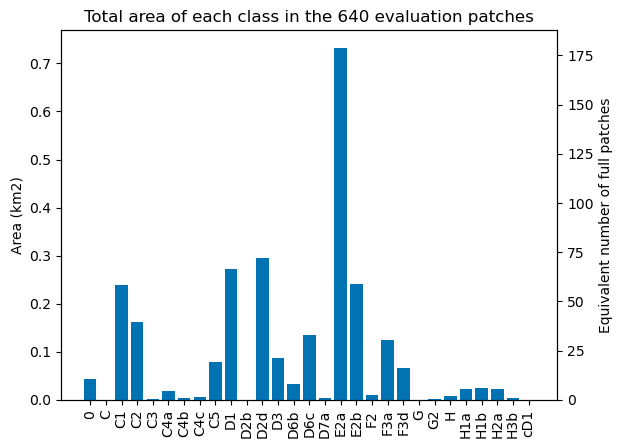

In [26]:

df_patches_only_concat = pd.concat(list(dict_pols_detailed_rand.values()))
unique_classes = df_patches_only_concat['Class_low'].unique()
dict_total_area = {}
dict_total_patches = {}
unique_classes = np.sort(unique_classes)
for c in unique_classes:
    area_m = df_patches_only_concat[df_patches_only_concat['Class_low'] == c]['geometry'].area.sum()
    dict_total_area[c] = area_m / 1e6  # convert to km2
    dict_total_patches[c] = area_m  / (64 * 64)  # convert to patches

## Bar plot of total area of each class
ax = plt.subplot(111)
ax.bar(dict_total_area.keys(), dict_total_area.values())
# ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90);
plt.xticks(rotation=90);
ax.set_ylabel('Area (km2)')
ax.set_title(f'Total area of each class in the {len(dict_pols_detailed_rand)} evaluation patches');

ax2 = ax.twinx()
ax2.bar(dict_total_area.keys(), dict_total_patches.values(), alpha=0.5)
ax2.set_ylabel('Equivalent number of full patches')

In [ ]:
pd_outline = lca.load_pols(path_dict['pd_outline'])
os_grid = lca.load_pols(path_dict['landscape_character_grid_path'])
# path_dict.keys()

In [ ]:
len(os_grid)

2125

In [ ]:
## Find all os grid polygons that intersect with pd_outline 
os_grid = os_grid[os_grid.intersects(pd_outline.iloc[0]['geometry'])]
print(len(os_grid))

1617


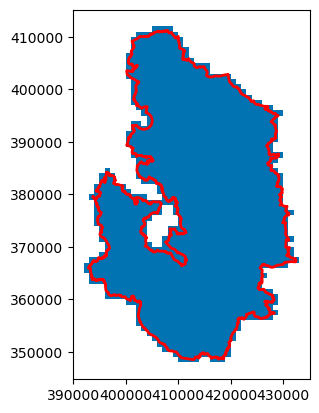

In [ ]:
ax = plt.subplot(111)


os_grid.plot(ax=ax)
pd_outline.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

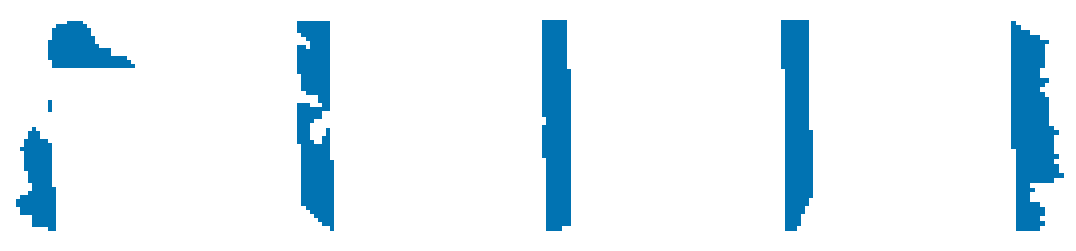

In [ ]:
# 330 * 5
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for ii in range(5):
    dir_name = f'../content/os_grid_pd/all_tiles_part_{ii}'
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    df_sub = os_grid.iloc[ii*330:(ii+1)*330]
    df_sub.to_file(f'{dir_name}/all_tiles_part{ii}.shp')
    df_sub.plot(ax=ax[ii])
    ax[ii].axis('off')

### Example tile:

(3, 8000, 8000) <class 'numpy.ndarray'>


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


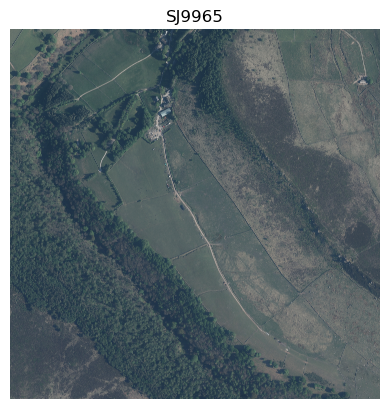

In [ ]:
## Load image:

example_tiff_file = 'SJ9965.tif'
# example_tiff_file = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/tile_masks_2022/SE0800_lc_2022_mask.tif'
example_tiff_path = os.path.join(path_dict['image_path'], example_tiff_file)
# example_tiff_path = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/tile_masks_2022/SK2196_lc_2022_mask.tif'
ex_tile = lca.load_tiff(tiff_file_path=example_tiff_path, datatype='da')
lcv.plot_image_simple(im=ex_tile, name_file=example_tiff_file)

# tmp = lcv.plot_image_as_patches(im=ex_tile, name_file=example_tiff_file)

### Automatically intersect LC polygons with tiles; and create rasterized patches:

In [ ]:
## Load landcover polygons:

df_lc_80s, mapping_class_inds = lca.load_landcover(pol_path=path_dict['lc_80s_path'])
# df_lc_80s = lca.load_pols(pol_path='/home/tplas/repos/cnn-land-cover/content/evaluation_polygons/Landscape_Character_80s_2022.shp')
df_lc_80s = lca.test_validity_geometry_column(df=df_lc_80s)
df_lc_80s = lca.add_main_category_column(df_lc=df_lc_80s) 
df_lc_80s

,AREA,PERIMETER,LC_N_80,LC_D_80,MI_PRINX,geometry,Class_Code
0,2.288935e+05,1931.281171,19,Improved Pasture,1,"POLYGON ((407724.666 411168.713, 407854.641 41...",E
1,8.103939e+05,6180.868624,12,Upland Heath/Grass Mosaic,2,"POLYGON ((407267.642 410992.244, 407326.372 41...",D
2,3.024182e+06,30493.715242,7,Upland Grass Moor,3,"POLYGON ((405616.816 409724.857, 405615.571 40...",D
3,3.141201e+06,17829.297205,8,Blanket Peat Grass Moor,4,"POLYGON ((406402.661 410926.453, 406419.695 41...",D
4,5.524007e+03,360.239964,20,Rough Pasture,5,"POLYGON ((405569.382 410874.398, 405584.644 41...",E
...,...,...,...,...,...,...,...
8477,2.946860e+03,210.674150,19,Improved Pasture,8478,"POLYGON ((416356.527 348866.777, 416357.591 34...",E
8478,1.588031e+03,186.955561,1,Broadleaved High Forest,8479,"POLYGON ((412660.720 348649.559, 412658.280 34...",C
8479,6.253066e+03,340.410463,36,Isolated Farmsteads (>0.25 ha),8480,"POLYGON ((412871.439 348609.371, 412858.033 34...",H
8480,1.770921e+05,2285.262979,2,Coniferous High Forest,8481,"POLYGON ((411786.076 405491.149, 411803.349 40...",C


In [ ]:
# df_lc_80s = df_lc_80s.drop('AREA', axis=1)
# df_lc_80s['area'] = df_lc_80s['geometry'].area

df_h = df_lc_80s[df_lc_80s['Class_Code'] == 'H']
area_h = df_h['area'].sum()
total_area = df_lc_80s['area'].sum()

print('Total area: ', total_area / 1e4)
print('Area H: ', area_h / 1e4)
print('Percentage H: ', area_h/total_area)



Total area:  143835.0136998267
Area H:  2935.024649254558
Percentage H:  0.02040549497481707


In [ ]:
# ## Get intersection of polygons with tiles
# # df_tiles = lca.create_df_with_tiff_coords(tiff_paths=lca.get_all_tifs_from_dir(path_dict['image_path']), verbose=1)  # get df of square polygons of tiles 
# df_tiles = lca.create_df_with_tiff_coords(tiff_paths=lca.get_all_tifs_from_dir('/home/tplas//data/gis/most recent APGB 12.5cm aerial/gradbach_6tiles/12.5cm Aerial Photo/117383-1_RGB_1_Shape/tiles/'), verbose=1)  # get df of square polygons of tiles 
# # df_tiles = lca.create_df_with_tiff_coords(tiff_paths=lca.get_all_tifs_from_dir(path_dict['image_path']), verbose=1)  # get df of square polygons of tiles 
# dict_intersect_pols = lca.get_pols_for_tiles(df_pols=df_lc_80s, df_tiles=df_tiles)

In [ ]:
## Load shp files of tiles and intersect with PD LC:

df_tiles_sample = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/CDE_training_tiles/CDE_training_tiles.shp')
# df_tiles_sample = lca.load_pols('/home/tplas/data/gis/most recent APGB 12.5cm aerial/urban_tiles/3_urban_tiles/3_urban_tiles.shp')
dict_intersect_pols_tiles_sample = lca.get_pols_for_tiles(df_pols=df_lc_80s, df_tiles=df_tiles_sample, col_name='PLAN_NO',
                                                          extract_main_categories_only=False)
df_tiles_sample_lc = pd.concat(list(dict_intersect_pols_tiles_sample.values())).reset_index(drop=True)


100%|██████████| 11/11 [00:00<00:00, 49.98it/s]


In [ ]:
# lca.add_main_category_index_column(dict_intersect_pols_tiles_sample['SE1301'])
dict_intersect_pols_tiles_sample['SE1301']

,geometry,LC_N_80,LC_D_80
0,"MULTIPOLYGON (((412999.996 401267.618, 413037....",7,Upland Grass Moor
1,"POLYGON ((413781.665 401999.998, 413797.467 40...",8,Blanket Peat Grass Moor
2,"POLYGON ((413999.998 401892.099, 413961.692 40...",6,Upland Heath


In [ ]:
## Convert all polygons labels to raster and save:

dict_shp = dict_intersect_pols_tiles_sample
# save_mask_dir = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/tile_masks_2022/'
# save_mask_dir = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/urban_tiles/tiles/117637_20221207/tile_masks/'
# save_mask_dir = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/tile_masks/'
save_mask_dir = '/home/tplas/data/gis/tmp_trial/original/'
for key_tile, df_tile in tqdm(dict_shp.items()):
    # dict_shp[key_tile] = lca.add_main_category_index_column(df_tile)
    ex_raster = lca.convert_shp_mask_to_raster(df_shp=df_tile, filename=key_tile + '_lc_80s_mask', 
                                maskdir=save_mask_dir, 
                                # col_name='class_ind',
                                col_name='LC_N_80',
                                # ex_tile=ex_raster,
                                # resolution=(-0.125, 0.125),
                                plot_raster=False, # whether to plot
                                save_raster=True, # whether to store on disk
                                verbose=0)
    # assert ex_raster['class_ind'].shape == (8000, 8000), key_tile
    assert ex_raster['LC_N_80'].shape == (8000, 8000), key_tile


100%|██████████| 11/11 [00:38<00:00,  3.48s/it]


### Some plots of class distributions:

Text(0.5, 1.0, 'Distribution of LC of entire PD')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


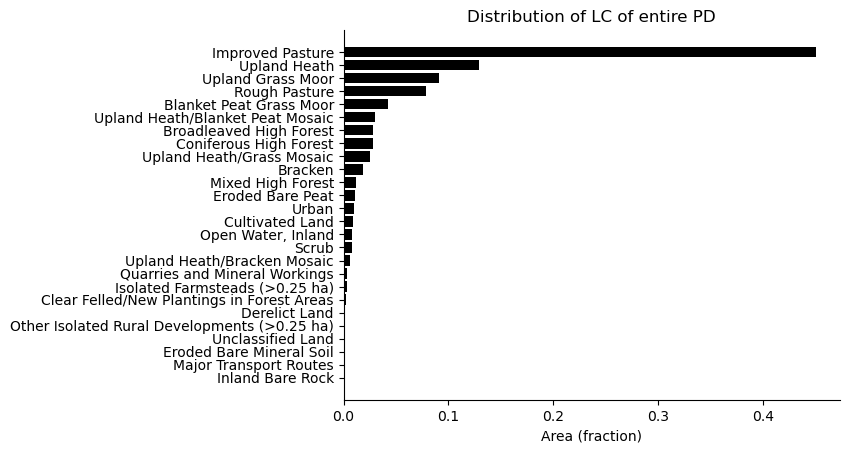

In [ ]:
ax_distr, _ = lcv.plot_distr_classes_from_shape(df_lc=df_lc_80s)
ax_distr.set_title('Distribution of LC of entire PD')

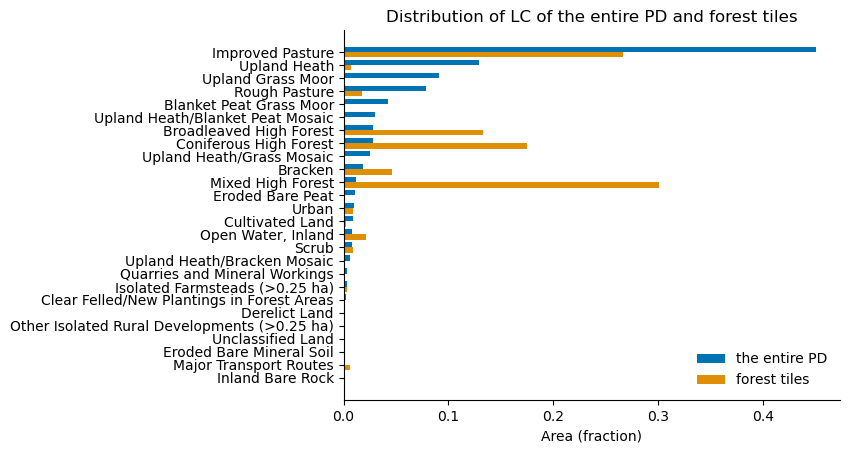

In [ ]:
ax_distr, _ = lcv.plot_distr_classes_from_multiple_shapes(dict_dfs_lc={'the entire PD': df_lc_80s, 'forest tiles': df_tiles_few_changes_lc})

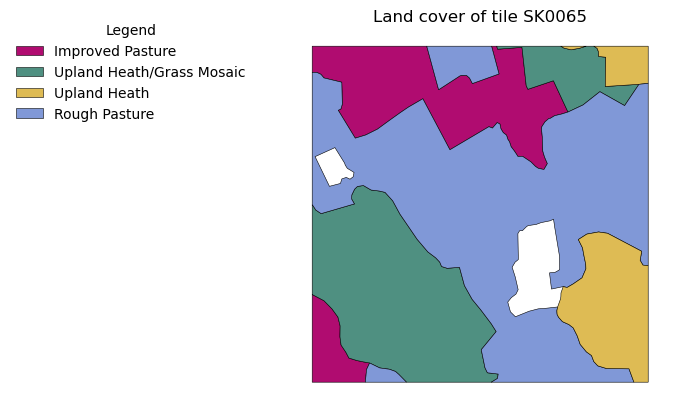

In [ ]:
_ = lcv.plot_lc_from_gdf_dict(df_pols_tiles=dict_intersect_pols, tile_name="SK0065")

Current data size cube is 512.128008 MB
New cube data size is 64.128008 MB


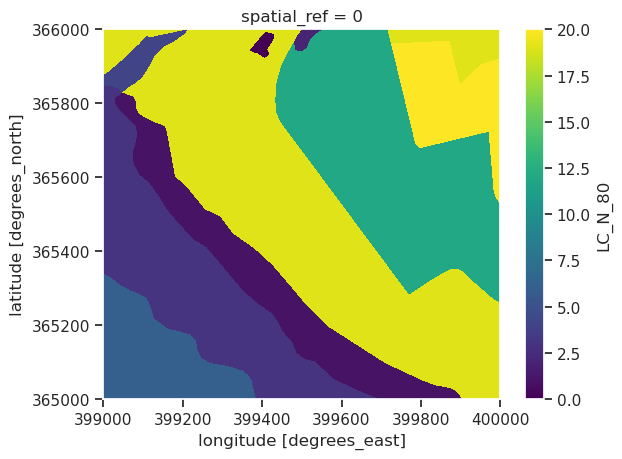

In [ ]:
## Example: convert polygons labels to raster:
dict_shp = dict_intersect_pols
key_tile = "SJ9965"

ex_raster = lca.convert_shp_mask_to_raster(df_shp=dict_shp[key_tile], filename=key_tile + '_lc_80s_mask', 
                                plot_raster=True, # whether to plot
                                save_raster=False, # whether to store on disk
                                verbose=1)

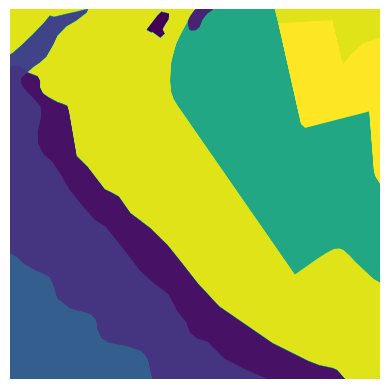

In [ ]:
## Load saved raster mask
ex_mask_tif = lca.load_tiff(tiff_file_path=os.path.join(path_dict['mask_path'], 'SJ9965' + '_lc_80s_mask.tif'))
lcv.plot_image_simple(im=ex_mask_tif)

## Create Patches and save:

In [ ]:
# list_tiff_files = lca.get_all_tifs_from_dir(dirpath='/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/')
list_tiff_files = lca.get_all_tifs_from_dir(dirpath='/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/')
# list_mask_files = lca.get_all_tifs_from_dir(dirpath='/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/tile_masks/')list_mask_files = lca.get_all_tifs_from_dir(dirpath='/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/tile_masks/')
list_mask_files = lca.get_all_tifs_from_dir(dirpath='/home/tplas/data/gis/tmp_trial/original/')

print(f'Found {len(list_tiff_files)} images and {len(list_mask_files)} masks')
print(list_tiff_files[:4])

Found 11 images and 11 masks
['/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/SK0560.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/SK0796.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/SK2669.tif', '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/tiles/SK2567.tif']


## Continue:

In [ ]:
# dir_im_patches = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/images/'
# dir_mask_patches = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/CDE_training_tiles/masks/'
dir_im_patches = '/home/tplas/data/gis/tmp_trial/original/images/'
dir_mask_patches = '/home/tplas/data/gis/tmp_trial/original/masks/'

lca.create_and_save_patches_from_tiffs(list_tiff_files=list_tiff_files, list_mask_files=list_mask_files,
                                       dir_im_patches=dir_im_patches, dir_mask_patches=dir_mask_patches,
                                       mask_fn_suffix='_lc_80s_mask.tif',
                                       save_files=True)

## Notebook to create label mapping transformations
- Map old labels to new labels
- Old labels: 1980s classification scheme
- Multiple new label schemes possible.


In [ ]:
# save_folder = '/home/tplas/repos/cnn-land-cover/content/label_mapping_dicts/'
dict_mapping = lca.create_empty_label_mapping_dict()

In [4]:
tmp = lca.create_new_label_mapping_dict(save_mapping=True, mapping_type='all_relevant_subclasses')

adding scrub
adding wetland
adding transport


### Create table with key for LC schema:
 - Old 80s schema
 - New 2022 schema 
 - Mapping betweens those 
 - Code + name + index

In [ ]:
df_schema = lca.create_df_mapping_labels_2022_to_80s()

adding scrub
adding wetland
adding transport


In [ ]:
df_schema

,description_2022,description_80s,code_80s,code_2022,index_2022,index_80s
0,NO CLASS,NO CLASS,0,0,0,0
1,Broadleaved High Forest,Broadleaved High Forest,C1,C1,1,1
2,Coniferous High Forest,Coniferous High Forest,C2,C2,2,2
3,Mixed High Forest,Mixed High Forest,C3,C3,3,3
4,Scrub,Scrub,C4,C4a,4,4
5,Scrub Pasture,Scrub,C4,C4b,5,4
6,Woodland/Scrub Edge,Scrub,C4,C4c,6,4
7,Clear Felled/New Plantings in Forest Areas,Clear Felled/New Plantings in Forest Areas,C5,C5,7,5
8,Upland Heath,Upland Heath,D1,D1,8,6
9,Upland Grass Moor,Upland Grass Moor,D2b,D2b,9,7


## Create new selection of tiles for NTM data:

In [ ]:
df_tiles_train = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/CDE_training_tiles/CDE_training_tiles.shp')
df_tiles_eval = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/evaluation_sample_50tiles/evaluation_sample_50tiles.shp')
df_tiles_concat = pd.concat([df_tiles_train, df_tiles_eval], axis=0)
df_tiles_concat = df_tiles_concat.reset_index(drop=True)

list_tiles_eval_exclude = ['SE0503', 'SE0705', 'SE0800', 'SE1203', 'SE1400', 'SK0684', 
                           'SK0686', 'SK0790', 'SK0896', 'SK0988', 'SK1399', 'SK1798', 
                           'SK1896', 'SK1992', 'SK1998', 'SK2091', 'SK2096', 'SK2196', 
                           'SK2777',   # up until here: eval without trees
                           'SK0752', 'SK0961', 'SJ9566', 'SK1588', 'SK1360',  # this row; eval already in NTM
                           'SE1301', 'SK0792', 'SK0796', 'SK1095', 'SK1295', 'SK2969']  # this row: training tiles without trees 

In [ ]:
df_tiles_ntm = df_tiles_concat[np.logical_not(df_tiles_concat['PLAN_NO'].isin(list_tiles_eval_exclude))]
assert len(df_tiles_ntm) == 31

In [ ]:
df_tiles_ntm.to_file('/home/tplas/repos/cnn-land-cover/content/tree_tiles/tiles_ntm_data/tiles_ntm_data.shp')

## Add NFI data to tile outlines.. v2

In [ ]:
df_tiles_outline = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/evaluation_sample_50tiles/evaluation_sample_50tiles.shp')
print(f'Loaded {len(df_tiles_outline)} tiles.')

## Load NFI data:
df_nfi = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/NFI_data/NFI_pd_incl_ambiguous.shp')
print(f'Loaded {len(df_nfi)} NFI polygons.')
nfi_class_col = 'Class_low'
df_nfi = df_nfi.drop(columns=[col_name for col_name in df_nfi.columns if col_name not in ['Class_low', 'geometry']])
df_nfi['source'] = 'NFI 2020 retrieved 2023-02-15' 

## Load main-class annotated + FGH layer:
df_fgh_main = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/evaluation_polygons/landscape_character_2022_FGH-override/landscape_character_2022_FGH-override.shp')
print(f'Loaded {len(df_fgh_main)} FGH polygons.')
filepath_manual_fgh_layer = '/home/tplas/data/gis/tmp_fgh_layer/tmp_fgh_layer.shp'
date_fgh_modified = str(datetime.datetime.strptime(time.ctime(os.path.getmtime(filepath_manual_fgh_layer)), '%a %b %d %H:%M:%S %Y').date())
source_fgh = f'OS NGD retrieved {date_fgh_modified}'

## Remove all tiny FGH polygons:
list_inds_remove = [] 
list_inds_keep = []
for ii in range(len(df_fgh_main)):
    label = df_fgh_main['Class_low'][ii].upper()
    if len(label)  == 1:
        if label in ['C', 'D', 'E']:
            list_inds_remove.append(ii)
        elif label in ['F', 'G', 'H']:
            if df_fgh_main.iloc[ii]['geometry'].area < 100:
                list_inds_remove.append(ii)
            else:
                list_inds_keep.append(ii) 
        else:
            raise ValueError('Unknown label.')
    else:
        list_inds_keep.append(ii)

assert len(list_inds_remove) + len(list_inds_keep) == len(df_fgh_main) 
df_fgh_main = df_fgh_main.iloc[np.array(list_inds_keep)]
df_fgh_main = df_fgh_main.reset_index(drop=True)
df_fgh_main = df_fgh_main.drop(columns=['Class_high'])

## Add sources:
list_sources = []
for ii in range(len(df_fgh_main)):
    label = df_fgh_main['Class_low'][ii].upper()
    if len(label)  == 1:
        if label in ['C', 'D', 'E']:
            raise ValueError('Still some CDE labels.')
        elif label in ['F', 'G', 'H']:
            list_sources.append('Manual annotation DA SG 2023')
        else:
            raise ValueError('Unknown label.')
    else:
        if label[0] in ['C', 'D', 'E']:
            list_sources.append('Manual annotation DA SG 2023')
        elif label[0] in ['F', 'G', 'H']:
            list_sources.append(source_fgh)
        else:
            raise ValueError(f'Unknown label {label}.')

assert len(list_sources) == len(df_fgh_main)
df_fgh_main['source'] = list_sources
assert (set(df_nfi.columns) == set(df_fgh_main.columns)), f'Columns of NFI and FGH dataframes are not the same: {df_nfi.columns} vs {df_fgh.columns}'

df_fgh_main = lca.test_validity_geometry_column(df_fgh_main)
df_nfi = lca.test_validity_geometry_column(df_nfi)

Loaded 50 tiles.
Loaded 2935 NFI polygons.
Loaded 1807 FGH polygons.
Geometry Ring Self-intersection[407643.878683077 352269.720591962] for inds [984]
Attempting to make valid
Done
Geometry Ring Self-intersection[396662.087 372036.395] for inds [2088]
Attempting to make valid
Done


In [ ]:
df_merged_manual_layers = pd.concat([df_nfi, df_fgh_main], axis=0)
df_merged_manual_layers = df_merged_manual_layers.reset_index(drop=True)
dict_merged = lca.get_pols_for_tiles(df_pols=df_merged_manual_layers, df_tiles=df_tiles_outline, 
                            col_name='PLAN_NO', 
                            col_ind_name='Class_low', col_class_name='source', verbose=0)


100%|██████████| 50/50 [00:00<00:00, 56.24it/s]


In [ ]:
list_manual_annotated_tiles = ['SK0752', 'SK0852', 'SK1357', 'SK2055']
for tilename in list_manual_annotated_tiles:
    ## Get rid of 0 because it's just tiny stripes
    dict_merged[tilename] = dict_merged[tilename][dict_merged[tilename]['Class_low'] != '0']

for tilename, gdf in dict_merged.items():
    # print(f'{tilename}: {len(gdf)}')
    
    dict_merged[tilename] = gdf.explode(index_parts=True).reset_index(drop=True)
    # assert that all goemetry re Polygon
    for ii in range(len(dict_merged[tilename])):
        assert dict_merged[tilename]['geometry'][ii].geom_type == 'Polygon', f'Found a non-Polygon geometry in {tilename}'



In [ ]:
## removing overlap between NFi and FGH
for tilename, gdf in dict_merged.items():  # using new loop to make sure exploding is ok 
    ## see if polygons with NFI source intersect with any other polygons:
    inds_nfi = np.where(gdf['source'] == 'NFI 2020 retrieved 2023-02-15')[0]

    if len(inds_nfi) > 0:
        
        gdf_fgh = gdf[gdf['source'] == source_fgh] 
        if len(gdf_fgh) == 0:
            continue
        merged_pol_non_nfi = gdf_fgh['geometry'].unary_union
        list_new_pols = []
        for ind in inds_nfi:
            pol_orig = gdf.iloc[ind]['geometry']
            pol_diff = pol_orig.difference(merged_pol_non_nfi)
            if pol_diff != pol_orig:  # overlap 
                list_new_pols.append(pol_diff)
            else:
                list_new_pols.append(pol_orig)

        assert len(gdf.iloc[inds_nfi]) == len(list_new_pols)
        # if len(list_new_pols) == 1:
        list_new_pols = gpd.GeoSeries(list_new_pols)
        # break
        gdf.loc[inds_nfi, 'geometry'] = list_new_pols
        gdf = lca.test_validity_geometry_column(gdf)
        gdf = gdf.explode(index_parts=True).reset_index(drop=True)
        gdf = lca.test_validity_geometry_column(gdf)
        dict_merged[tilename] = gdf 
        

In [ ]:
df_merged = pd.concat(list(dict_merged.values())).reset_index(drop=True)
df_merged = df_merged[df_merged['geometry'].area > 1]
df_merged = df_merged.reset_index(drop=True)
df_merged = lca.test_validity_geometry_column(df_merged) 
df_merged.to_file('/home/tplas/repos/cnn-land-cover/content/evaluation_polygons/landscape_character_2022_detailed_CFGH-override/landscape_character_2022_detailed_CFGH-override.shp')
df_merged

,Class_low,source,geometry
0,0,0,"POLYGON ((405000.003 403000.002, 405000.003 40..."
1,0,0,"POLYGON ((406999.999 404999.999, 406999.999 40..."
2,C,NFI 2020 retrieved 2023-02-15,"POLYGON ((408741.500 400245.000, 408753.000 40..."
3,G2,OS NGD retrieved 2023-01-10,"POLYGON ((408320.500 400187.500, 408319.500 40..."
4,G2,OS NGD retrieved 2023-01-10,"POLYGON ((408384.500 400253.000, 408382.000 40..."
...,...,...,...
1358,F2,OS NGD retrieved 2023-01-10,"POLYGON ((427935.150 377017.270, 427933.890 37..."
1359,F2,OS NGD retrieved 2023-01-10,"POLYGON ((427973.790 377059.340, 427960.350 37..."
1360,H1b,OS NGD retrieved 2023-01-10,"POLYGON ((427948.110 377928.370, 427949.420 37..."
1361,0,0,"POLYGON ((427000.003 377000.004, 427000.003 37..."


In [ ]:
# gdf.plot(column='source', figsize=(15, 15))
# plt.axis('off')

## Create tile outlines + override layers for manual annotation
- Get list of tiles
- Get tile outlines 
- Override with NFI (some detailed, some not) + add source 
- Override with NGD (detailed) + add source 

In [33]:
# df_tiles_outline = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/evaluation_sample_50tiles/evaluation_sample_50tiles.shp')
df_tiles_outline = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/evaluation_sample_50tiles/eval_2_30tiles_outlines.shp')
print(f'Loaded {len(df_tiles_outline)} tiles.')

## Load FGH data:
filepath_manual_fgh_layer = '/home/tplas/data/gis/tmp_fgh_layer/tmp_fgh_layer.shp'
df_fgh = lca.load_pols(filepath_manual_fgh_layer)
date_fgh_modified = str(datetime.datetime.strptime(time.ctime(os.path.getmtime(filepath_manual_fgh_layer)), '%a %b %d %H:%M:%S %Y').date())
   
assert len(df_fgh) == 18056, 'not as expected'
print(f'Loaded {len(df_fgh)} FGH polygons.')
## Replace lc_label column by Class_low column:
df_fgh['Class_low'] = df_fgh['lc_label']
df_fgh = df_fgh.drop(columns=['lc_label'])
df_fgh['source'] = f'OS NGD retrieved {date_fgh_modified}'

## Load NFI data:
df_nfi = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/NFI_data/NFI_pd_incl_ambiguous.shp')
assert len(df_nfi) == 2935, 'not as expected'
print(f'Loaded {len(df_nfi)} NFI polygons.')
nfi_class_col = 'Class_low'
df_nfi = df_nfi.drop(columns=[col_name for col_name in df_nfi.columns if col_name not in ['Class_low', 'geometry']])
df_nfi['source'] = 'NFI 2020 retrieved 2023-02-15' 



Loaded 30 tiles.
Loaded 18056 FGH polygons.
Loaded 2935 NFI polygons.


In [ ]:
# ## Merge NFI and FGH layers into one df. Resolve overlaps by giving priority to FGH layer:

# df_diff = gpd.overlay(df_nfi, df_fgh, how='difference')  # Get df pred polygons that are not in df fgh 
# df_diff = df_diff.explode().reset_index(drop=True)
# df_intersect = gpd.overlay(df_nfi, df_fgh, how='intersection')  # Get overlap between df pred and df fgh
# df_intersect['Class_low'] = df_intersect['Class_low_2']  #  FGH layer has priority (and was 2nd arg in overlay() above)
# df_intersect['source'] = df_intersect['source_2']
# df_intersect = df_intersect.drop(['Class_low_1', 'Class_low_2'], axis=1)
# df_intersect = df_intersect.drop(['source_1', 'source_2'], axis=1)
# df_intersect = df_intersect.explode().reset_index(drop=True)  # in case multiple polygons are created by intersection
# df_merged_manual_layers = gpd.GeoDataFrame(pd.concat([df_diff, df_intersect], ignore_index=True))  # Concatenate all polygons


In [34]:
# dict_nfi, df_nfi_in_tiles = lca.get_pols_for_tiles_simple(df_pols=df_nfi, df_tiles=df_tiles_outline)
# dict_fgh, df_fgh_in_tiles = lca.get_pols_for_tiles_simple(df_pols=df_fgh, df_tiles=df_tiles_outline)

df_merged_manual_layers = pd.concat([df_nfi, df_fgh], axis=0)
df_merged_manual_layers = df_merged_manual_layers.reset_index(drop=True)
dict_merged = lca.get_pols_for_tiles(df_pols=df_merged_manual_layers, df_tiles=df_tiles_outline, col_name='PLAN_NO', 
                            col_ind_name='Class_low', col_class_name='source', verbose=0)
assert (set(df_nfi.columns) == set(df_fgh.columns)), f'Columns of NFI and FGH dataframes are not the same: {df_nfi.columns} vs {df_fgh.columns}'

## Create dict for each tile with merged nfi and fgh data:
# dict_merged = {} 
# for tilename, df_nfi_tile in tqdm(dict_nfi.items()):
#     df_fgh_tile = dict_fgh[tilename]
#     df_merged = pd.concat([df_nfi_tile, df_fgh_tile], axis=0)
#     df_merged = df_merged.reset_index(drop=True)
#     dict_merged[tilename] = df_merged

100%|██████████| 30/30 [00:05<00:00,  5.14it/s]


In [35]:
## check if any polygons overlap with others in dict_nfi['SK0852'] : 
# tmp = dict_nfi['SK0852'].copy()

for tilename, df_tile in tqdm(dict_merged.items()):
    tmp = df_tile.copy()
    list_conflicts = []
    for ii in range(len(tmp)):
        for jj in range(ii, len(tmp)):
            if ii != jj and tmp.iloc[ii]['geometry'].intersection(tmp.iloc[jj]['geometry']).area > 0:
                assert tmp.iloc[ii]["source"] != tmp.iloc[jj]["source"]
                list_conflicts.append((ii, jj))
                print(ii, jj) 
                print(f'Class_low of both: {tmp.iloc[ii]["Class_low"]}, {tmp.iloc[jj]["Class_low"]}')
                # print(f'Source of both: {tmp.iloc[ii]["source"]}, {tmp.iloc[jj]["source"]}')
                # print(f'Area of overlap and difference: {tmp.iloc[ii]["geometry"].intersection(tmp.iloc[jj]["geometry"]).area}, {tmp.iloc[ii]["geometry"].difference(tmp.iloc[jj]["geometry"]).area}')

    source_replace = 'NFI 2020 retrieved 2023-02-15'
    ## go through conflicts are replace source_replace with other source:
    for ii, jj in list_conflicts:
        source_ii = tmp.iloc[ii]["source"]
        source_jj = tmp.iloc[jj]["source"]
        if source_ii == source_replace:
            replace_ind = ii 
            other_ind = jj
            source_other = source_jj
        else:
            replace_ind = jj
            other_ind = ii
            source_other = source_ii
        
        area_intersection = tmp.iloc[replace_ind]['geometry'].intersection(tmp.iloc[other_ind]['geometry'])
        area_difference = tmp.iloc[replace_ind]['geometry'].difference(tmp.iloc[other_ind]['geometry'])

        # tmp.loc[[replace_ind], 'geometry'] = gpd.GeoSeries([area_difference]) # replace geometry of replace_ind with difference 
        ## add new row with intersection geometry and other source:
        tmp = tmp.append({'geometry': area_intersection, 'Class_low': tmp.iloc[other_ind]['Class_low'],
                        'source': source_other}, ignore_index=True)
        tmp = tmp.append({'geometry': area_difference, 'Class_low': tmp.iloc[replace_ind]['Class_low'],
                        'source': source_replace}, ignore_index=True)
        tmp = tmp.drop([replace_ind], axis=0)
        print(f'area intersection: {area_intersection}, area difference: {area_difference}')
    dict_merged[tilename] = tmp.copy() # update dict_nfi with new polygons

 17%|█▋        | 5/30 [00:00<00:00, 37.62it/s]

7 14
Class_low of both: C2, H1b
8 13
Class_low of both: C2, H1a
9 14
Class_low of both: C5, H1b
10 14
Class_low of both: C5, H1b
area intersection: POLYGON ((400768.2084634736 375996.1846957489, 400768.2 375997.52, 400774.32 375997.75, 400780.12 375997.970000001, 400784.96 375998.189999999, 400786.85 375998.35, 400791.01 375998.65, 400805.49 375999.16, 400824.54 375999.5, 400829.15 376000, 400829.1534234196 376000.0003710545, 401000.0022356478 376000.0003710545, 401000.0022356478 375985.83939673, 401000 375985.84, 400999.33 375986.03, 400994.5 375987.27, 400983.54 375989.85, 400974.38 375991.62, 400969.44 375992.28, 400964.4 375992.73, 400960.07 375993, 400955.64 375993.16, 400951.61 375993.13, 400947.68 375993, 400942.44 375992.95, 400933.57 375993.08, 400928.03 375993.23, 400920.91 375993.72, 400912.22 375994.77, 400903.06 375995.63, 400885.62 375996.22, 400882.21 375996.17, 400867.28 375996.55, 400853.44 375996.36, 400843.61 375995.69, 400834.6 375994.84, 400807.63 375993.46, 400791

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: POLYGON EMPTY, area difference: POLYGON ((405830.59 367324.24, 405833.22 367322.359999999, 405835.34 367321.18, 405841.475 367329.596999999, 405848.318 367339.824999999, 405852.14 367337.43, 405862.43 367331.75, 405869.65 367325.98, 405870.77 367324.869999999, 405876.49 367318.9, 405878.54 367316.210000001, 405886.34 367306.029999999, 405893.44 367296.16, 405896.84 367291.27, 405900.27 367279.23, 405901.61 367273.609999999, 405905.23 367270.74, 405907.67 367268.960000001, 405911.92 367266.09, 405915.46 367263.609999999, 405920.22 367260.439999999, 405923.26 367258.470000001, 405933.59 367250.630000001, 405945.54 367241.91, 405944.15 367241.050000001, 405943.01 367240.640000001, 405939.17 367238.49, 405942.88 367237.689999999, 405945.81 367236.85, 405948.7 367235.68, 405952.14 367233.52, 405955.38 367231.16, 405958.15 367228.82, 405960.64 367226.289999999, 405963.43 367222.99, 405965.08 367220.859999999, 405966.94 367218.060000001, 405968.72 367215.27, 405969.02 36721

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: POLYGON EMPTY, area difference: POLYGON ((409901.16 356822.859999999, 409916 356807.060000001, 409909.784 356792.335999999, 409898.005 356783.082, 409880.337 356795.141000001, 409864.913 356802.152000001, 409850.76 356809.09, 409849.85 356806.51, 409837.991 356819.259, 409819.55 356833.49, 409822.87 356836.460000001, 409823.45 356837.16, 409823.84 356837.949999999, 409824.12 356839.029999999, 409824.22 356839.82, 409824.11 356840.119999999, 409823.82 356840.91, 409824.51 356842.390000001, 409824.91 356843.369999999, 409825.8 356844.460000001, 409841.22 356861.720000001, 409857.14 356879.279999999, 409867.02 356890.33, 409876.343 356901.479, 409891.33 356890.789999999, 409888.59 356884.529999999, 409901.651 356872.262, 409900.809 356864.971000001, 409896.603 356855.716, 409895.201 356845.34, 409891.77 356830.710000001, 409899.13 356824.689999999, 409901.16 356822.859999999))
area intersection: POLYGON EMPTY, area difference: POLYGON ((409280.346 356987.946, 409281.72 

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

2 13
Class_low of both: C1, H1b
3 8
Class_low of both: C1, F2
4 13
Class_low of both: C1, H1b
4 22
Class_low of both: C1, 0
5 9
Class_low of both: C1, H1a
5 13
Class_low of both: C1, H1b
5 17
Class_low of both: C1, H3b
5 22
Class_low of both: C1, 0
6 11
Class_low of both: C1, H1a
6 13
Class_low of both: C1, H1b
7 8
Class_low of both: C1, F2
8 22
Class_low of both: F2, 0
13 22
Class_low of both: H1b, 0
area intersection: POLYGON ((409008.94 371469.51, 409004.69 371468.779999999, 409001.47 371468.33, 409004.69 371468.78, 409008.94 371469.51)), area difference: POLYGON ((409000.0036307042 371478.8162063796, 409001.56 371477.189999999, 409008.94 371469.51, 409004.69 371468.78, 409001.47 371468.33, 409000.0036307042 371468.060666865, 409000.0036307042 371478.8162063796))
area intersection: POLYGON EMPTY, area difference: POLYGON ((409179.91 371490.4, 409173.154 371489.279999999, 409169.98 371497.630000001, 409169.49 371500.210000001, 409168.8 371502.779999999, 409168.31 371504.550000001, 40

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: GEOMETRYCOLLECTION EMPTY, area difference: GEOMETRYCOLLECTION EMPTY
area intersection: POLYGON EMPTY, area difference: POLYGON ((409075.497 371462.433, 409072.032 371461.846, 409071.36 371463.283, 409070.725 371464.447, 409069.614 371465.611, 409067.709 371466.829, 409065.38 371467.569, 409063.669 371467.889, 409069.44 371468.87, 409082.389 371471.031, 409078.874 371469.474, 409076.017 371468.099, 409074.852 371466.881, 409074.641 371465.453, 409074.958 371463.918, 409075.497 371462.433))
area intersection: POLYGON EMPTY, area difference: POLYGON ((409494.099 371840.617, 409492.908 371841.728, 409493.86 371843.15, 409494.157 371843.692, 409501.744 371839.796, 409505.845 371836.356, 409502.592 371828.472, 409492.194 371834.505, 409494.337 371837.68, 409494.495 371839.426, 409494.099 371840.617))
area intersection: POLYGON EMPTY, area difference: POLYGON ((409402.0179333461 371999.9953605728, 409401.53 371998.9, 409400.92 371997.3, 409400.86 371997.18, 409398.3 371993.

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: GEOMETRYCOLLECTION (POINT (409674.12 381185.16), POINT (409685.87 381193.34), LINESTRING (409645.35 381163.9, 409641.65 381164.4), LINESTRING (409608.78 381178.08, 409606.8 381178.15), LINESTRING (409606.8 381178.15, 409605.32 381178.1), LINESTRING (409590.62 381174.68, 409585.72 381173.48), LINESTRING (409585.72 381173.48, 409583.22 381172.98), LINESTRING (409583.22 381172.98, 409579.03 381172.52), LINESTRING (409579.03 381172.52, 409575.95 381172.34), LINESTRING (409575.95 381172.34, 409570.45 381172.25), LINESTRING (409555.56 381178.26, 409551.23 381181.75), POLYGON ((409671.8558816115 381183.5905542988, 409671.48 381183.33, 409659.85 381175.289999999, 409652.37 381169.51, 409645.35 381163.9, 409648.602 381166.499, 409650.11 381180.73, 409650.06 381181.04, 409649.79 381182.68, 409637.12 381190.63, 409628.52 381197.61, 409620.57 381206.38, 409611.97 381213.03, 409602.684 381218.972, 409601.89 381219.48, 409605.16 381221.119999999, 409605.1599999945 381221.120000003

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
 53%|█████▎    | 16/30 [00:01<00:01,  9.20it/s]

area intersection: MULTILINESTRING ((410914.7173198808 390999.9966667996, 410920.02 391119.65), (410920.02 391119.65, 410920.19 391122.53), (410920.19 391122.53, 410921.26 391139.97), (410921.26 391139.97, 410918.5 391376), (410922.5 391386.5, 410923.53 391388.81), (410923.53 391388.81, 410943.12 391428.9), (410943.12 391428.9, 410943.84 391430.96), (410943.84 391430.96, 410944.44 391433.05), (410944.44 391433.05, 410944.72 391434.23)), area difference: POLYGON ((410951.12 391313.970000001, 410951.106 391313.9, 410956.211 391313.9, 410999.9998569377 391313.9, 410999.9998569377 390999.9966667996, 410914.7173198808 390999.9966667996, 410920.02 391119.65, 410920.19 391122.53, 410921.26 391139.97, 410918.5 391376, 410919.91 391379.689999999, 410922.5 391386.5, 410923.53 391388.81, 410943.12 391428.9, 410943.84 391430.96, 410944.44 391433.05, 410944.72 391434.23, 410944.7595188579 391434.4455574065, 410991.2 391427.65, 410990.6 391427.050000001, 410988.39 391424.779999999, 410986.21 391422.

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
 60%|██████    | 18

area intersection: POLYGON EMPTY, area difference: POLYGON ((412159.525 358159.823, 412161.896 358155.783, 412157.333 358153.36, 412103.811 358124.935, 412099.79 358122.8, 412099.226 358122.521, 412097.895 358125.204, 412095.998 358124.176, 412085.359 358118.777, 412082.819 358123.072, 412090.7 358126.37, 412092.53 358127.23, 412099.71 358130.5, 412100.921 358131.063, 412105 358132.96, 412158.42 358159.27, 412159.525 358159.823))
area intersection: GEOMETRYCOLLECTION EMPTY, area difference: GEOMETRYCOLLECTION EMPTY
1 10
Class_low of both: C1, H1b
1 19
Class_low of both: C1, H3b
1 22
Class_low of both: C1, 0
2 3
Class_low of both: C1, F2
2 4
Class_low of both: C1, F2
2 6
Class_low of both: C1, H1a
2 7
Class_low of both: C1, H1a
2 8
Class_low of both: C1, H1a
2 10
Class_low of both: C1, H1b
2 15
Class_low of both: C1, H3b
2 16
Class_low of both: C1, H3b
2 17
Class_low of both: C1, H3b
2 22
Class_low of both: C1, 0
4 22
Class_low of both: F2, 0
10 22
Class_low of both: H1b, 0


/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: MULTIPOLYGON (((416919.3049699114 372994.7445290426, 416923.971 372989.25, 416928.23 372990.49, 416923.87 372989.22, 416921.64 372988.8, 416918.34 372987.7, 416915.78 372986.42, 416915.54 372986.3, 416913.24 372985.2, 416911.24 372983.8, 416909.04 372982.5, 416907.64 372981.3, 416906.78 372980.23, 416906.33 372979.57, 416905.94 372978.7, 416905.63 372977.77, 416905.4 372976.8, 416905.29 372975.48, 416905.55 372972.92, 416905.66 372972.14, 416905.77 372971.63, 416906.15 372970.76, 416906.47 372970.24, 416906.57 372970.09, 416907.17 372969.32, 416907.66 372968.9, 416908.51 372968.29, 416909.01 372968.03, 416909.85 372967.68, 416910.32 372967.57, 416911.27 372967.53, 416911.88 372967.64, 416912.58 372967.85, 416914.95 372968.99, 416918.64 372971.4, 416921.04 372973.2, 416923.14 372974.9, 416924.54 372976.2, 416925.74 372977.2, 416930.28 372980.52, 416936.76 372984.15, 416940.4 372985.99, 416943.49 372987.32, 416944.36 372987.57, 416946.94 372988.33, 416950.16 372988.85,

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

2 5
Class_low of both: C2, H1b
2 6
Class_low of both: C2, H3b
2 7
Class_low of both: C2, 0
3 7
Class_low of both: F2, 0
5 7
Class_low of both: H1b, 0
area intersection: GEOMETRYCOLLECTION (LINESTRING (416906.29 390725, 416915.39 390721.5), LINESTRING (416915.39 390721.5, 416925.49 390717.4), LINESTRING (416925.49 390717.4, 416932.39 390714.5), LINESTRING (416932.39 390714.5, 416940.29 390710.6), LINESTRING (416940.29 390710.6, 416948.24 390706.52), POLYGON ((416902.0899999999 390726.300000001, 416902.09 390726.300000001, 416906.29 390725, 416902.09 390726.3, 416902.0899999999 390726.300000001))), area difference: POLYGON ((416944.09 390589.300000001, 416944.79 390581, 416945.79 390571.699999999, 416946.69 390562.6, 416947.69 390553.1, 416947.79 390548.4, 416947.59 390545.5, 416947.19 390544.4, 416946.89 390543.300000001, 416946.79 390542.5, 416946.79 390541.699999999, 416946.99 390540.800000001, 416947.29 390540, 416947.99 390538.9, 416948.79 390537.800000001, 416949.29 390536.80000000

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
 83%|████████▎ | 25/30 [00:02<00:00,  8.40it/s]

area intersection: POLYGON ((417891.57 378303.57, 417891.36 378303.43, 417891.17 378303.3, 417890.96 378303.18, 417890.52 378302.95, 417890.3 378302.85, 417890.08 378302.76, 417889.85 378302.68, 417889.61 378302.62, 417889.38 378302.55, 417889.14 378302.49, 417888.9 378302.44, 417888.66 378302.41, 417888.41 378302.38, 417888.17 378302.36, 417887.69 378302.35, 417887.45 378302.37, 417887.21 378302.38, 417886.97 378302.41, 417886.74 378302.45, 417886.28 378302.55, 417886.05 378302.63, 417885.82 378302.71, 417885.61 378302.79, 417885.39 378302.89, 417885.19 378303.01, 417884.98 378303.13, 417884.78 378303.26, 417884.59 378303.4, 417884.41 378303.57, 417884.27 378303.69, 417884.11 378303.85, 417883.96 378304.02, 417883.8 378304.21, 417883.66 378304.39, 417883.4 378304.77, 417883.29 378304.97, 417883.18 378305.19, 417883.08 378305.4, 417882.98 378305.61, 417882.9 378305.82, 417882.82 378306.04, 417882.76 378306.26, 417882.71 378306.49, 417882.67 378306.71, 417882.63 378306.94, 417882.6 3783

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


1 16
Class_low of both: C1, H3b
2 13
Class_low of both: C1, H1b
3 13
Class_low of both: C1, H1b
3 23
Class_low of both: C1, 0
area intersection: GEOMETRYCOLLECTION (POINT (421116.05 361273.65), LINESTRING (421098.91 361276.48, 421104.57 361274.08), LINESTRING (421104.57 361274.08, 421109.04 361273.65), POLYGON ((421129.875 361281.625, 421135.4 361285.560000001, 421146.908 361292.677999999, 421146.9080608216 361292.67792807, 421135.4 361285.56, 421129.875 361281.625))), area difference: POLYGON ((421154.61 361277.1, 421152.15 361272.43, 421150.85 361270.810000001, 421139.75 361262.060000001, 421129.13 361254.529999999, 421126.94 361252.82, 421125.61 361251.02, 421125.27 361250.449999999, 421123.18 361247.32, 421121.78 361244.68, 421120.1 361241.35, 421118.3 361239.52, 421116.9 361238.4, 421115.01 361236.460000001, 421113.91 361235.050000001, 421113.31 361234.24, 421112.82 361232.32, 421112.72 361232.02, 421112.03 361230.199999999, 421111.63 361229.289999999, 421105.25 361222.59, 421104.

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/home/tplas/anacond

area intersection: POLYGON EMPTY, area difference: POLYGON ((423369.13 396779.18, 423374.26 396765.16, 423374.13 396759.3, 423365.06 396752.22, 423361.22 396750.32, 423355.41 396748.38, 423348.05 396745.19, 423343.78 396744.15, 423341.67 396743.59, 423335.88 396742.34, 423330.22 396741.4, 423322.24 396739.83, 423319.58 396738.5, 423317.15 396737.39, 423317.27 396737.87, 423316.41 396740.22, 423320.96 396746.9, 423322.91 396749.52, 423325.01 396752.68, 423326.55 396755.36, 423327.67 396757.95, 423328.71 396761.32, 423329.47 396765.38, 423330.22 396769.4, 423330.59 396771.94, 423330.9 396775.56, 423330.77 396777.6, 423330.71 396778.87, 423330.7 396778.98, 423337.16 396781.45, 423343.24 396783.79, 423354.89 396788.39, 423363.96 396791.93, 423366.39 396782.812, 423369.13 396779.18))
area intersection: POLYGON ((423000.0019495224 396499.4601912673, 423000.0019495224 396506.1602734395, 423007.7 396507.24, 423014.93 396508.78, 423021.76 396510.6, 423023.37 396511.03, 423025.58 396512.01, 4230

In [37]:
df_merged = pd.concat(list(dict_merged.values())).reset_index(drop=True)
df_merged

,geometry,Class_low,source
0,"POLYGON ((404000.001 406999.997, 404000.001 40...",0,0
1,"POLYGON ((405000.003 405372.630, 405007.500 40...",F2,OS NGD retrieved 2023-01-10
2,"POLYGON ((405000.003 404999.999, 405000.003 40...",0,0
3,"POLYGON ((409999.998 403000.002, 409999.998 40...",0,0
4,"POLYGON ((411367.253 400097.542, 411379.997 40...",C,NFI 2020 retrieved 2023-02-15
...,...,...,...
481,"POLYGON ((426078.301 377050.753, 426087.576 37...",C1,NFI 2020 retrieved 2023-02-15
482,"POLYGON ((426290.750 377986.500, 426275.730 37...",C1,NFI 2020 retrieved 2023-02-15
483,"POLYGON ((426272.570 377390.530, 426274.640 37...",G2,OS NGD retrieved 2023-01-10
484,"POLYGON ((426066.580 377851.980, 426066.480 37...",G2,OS NGD retrieved 2023-01-10


In [38]:
df_merged = lca.test_validity_geometry_column(df_merged) 

In [50]:
df_merged = df_merged[df_merged['geometry'].area > 0].explode().reset_index(drop=True)

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  """Entry point for launching an IPython kernel.


In [45]:
import shapely.geometry
type_line = shapely.geometry.collection.GeometryCollection
list_types = [type(x) for x in df_merged['geometry']]
np.where(np.array(list_types) == type_line)
# df_merged['geometry'].area 

(array([ 52,  53,  56,  57,  58,  59,  70, 115, 134, 135, 137, 138, 165,
        166, 173, 174, 202, 209, 210, 244, 245, 246, 247, 254, 255, 285,
        286, 315, 321, 322, 334, 335, 338, 341, 342, 387, 388, 439, 444,
        445, 452, 453]),)

In [49]:
np.where(df_merged['geometry'].area  == 0)

(array([ 24,  26,  50,  52,  53,  54,  56,  57,  58,  59, 116, 117, 119,
        120, 122, 123, 125, 127, 129, 131, 133, 137, 138, 139, 156, 158,
        161, 163, 165, 166, 167, 169, 171, 173, 174, 175, 203, 205, 207,
        209, 210, 242, 244, 245, 246, 247, 248, 250, 252, 254, 255, 275,
        277, 279, 281, 283, 285, 286, 302, 303, 304, 306, 308, 309, 311,
        313, 317, 319, 321, 322, 323, 330, 331, 332, 334, 335, 336, 339,
        340, 342, 382, 383, 385, 387, 388, 389, 442, 444, 445, 451, 452,
        453]),)

In [52]:
df_merged.to_file('/home/tplas/test/test_new_cfgh.shp')

RuntimeError: Failed to write record: {'id': '89', 'type': 'Feature', 'properties': {'Class_low': 'G2', 'source': 'OS NGD retrieved 2023-01-10'}, 'geometry': {'type': 'LineString', 'coordinates': ((405574.0, 395476.0), (405578.5, 395473.5))}}

In [ ]:
df_test = df_nfi

for ii in range(len(df_test)):
    for jj in range(ii, len(df_test)):
        if ii != jj and df_test.iloc[ii]['geometry'].intersection(df_test.iloc[jj]['geometry']).area > 1e-1:
            assert False, f'Polygons {ii} and {jj} still overlap with area {df_test.iloc[ii]["geometry"].intersection(df_test.iloc[jj]["geometry"]).area}'

In [ ]:
# dict_intersect_pols_tiles_sample = lca.get_pols_for_tiles(df_pols=df_lc_80s, df_tiles=df_tiles_sample, col_name='PLAN_NO',
#                                                           extract_main_categories_only=False)
# df_tiles_sample_lc = pd.concat(list(dict_intersect_pols_tiles_sample.values())).reset_index(drop=True)

dict_intersect_pols_tiles_sample = lca.get_pols_for_tiles(df_pols=df_nfi, df_tiles=df_tiles_sample, col_name='PLAN_NO',
                                                          extract_main_categories_only=False)
df_tiles_sample_lc = pd.concat(list(dict_intersect_pols_tiles_sample.values())).reset_index(drop=True)

## Create mask using habitat data
- Create mapping and save
- Add LC codes to habitat shape files
- Merge prio & non-prio? 
- Delete all irrelevant polygons

In [ ]:
df_merged = lca.prepare_habitat_data(save_df=True, get_intersection=True, add_tag_col=True)

In [ ]:
df_merged.to_file('../content/habitat_data_annotations/habitat_data_annotations.shp')

In [ ]:
df_merged = gpd.read_file('../content/habitat_data_annotations/habitat_data_annotations.shp')

In [ ]:
df_merged[df_merged['SEL_TRAIN'] == 1].groupby('Class_low').sum()

,SEL_TRAIN,area
Class_low,,
D1,6,3152340.320
D2a,7,5255077.822
F3a,3,6041197.782
F3d,10,450066.751


## Use peaty soils to relabel eval data

In [68]:
df_eval = lca.load_pols('../content/evaluation_polygons/landscape_character_2022_detailed_CFGH-override/landscape_character_2022_detailed_CFGH-override.shp')

In [71]:
df_eval.source.unique()

array(['0', 'NFI 2020 retrieved 2023-02-15',
       'OS NGD retrieved 2023-01-10', 'Manual annotation DA SG 2023'],
      dtype=object)

In [70]:
inds_new_annot = np.where([x is None for x in df_eval['source'] ])[0]
# len(inds_new_annot)
df_eval.loc[inds_new_annot, 'source'] = 'Manual annotation DA SG 2023'

In [72]:
tmp = lca.use_soil_data_to_overwrite(df_lc=df_eval)

Validating df_LC
Geometry Ring Self-intersection[407383.997302149 405117.495042628] for inds [1729]
Attempting to make valid
Done
Geometry Ring Self-intersection[407495.557080073 405488.00284208] for inds [1732]
Attempting to make valid
Done
Geometry Ring Self-intersection[407643.878683077 352269.720591962] for inds [480]
Attempting to make valid
Done
Geometry Ring Self-intersection[408417.677400001 379935.995392201] for inds [2383]
Attempting to make valid
Done
Geometry Ring Self-intersection[408541.7515 396901.351900002] for inds [2116]
Attempting to make valid
Done
Geometry Ring Self-intersection[414319.998781238 400124.960028019] for inds [1790]
Attempting to make valid
Done
Geometry Ring Self-intersection[414767.998541906 400865.088008983] for inds [1802]
Attempting to make valid
Done
Geometry Ring Self-intersection[418447.999008174 396652.194100004] for inds [2199]
Attempting to make valid
Done
Validating df_soil


../scripts/land_cover_analysis.py:1999: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  ## merge all geometries in df_soil to one geometry:


Geometry Hole lies outside shell[400465.5946 391382.811799999] for inds [334]
Attempting to make valid
Done
Geometry Hole lies outside shell[402475.6871 378319.594599999] for inds [275]
Attempting to make valid
Done
Geometry Hole lies outside shell[413452.3138 382853.907600001] for inds [500]
Attempting to make valid
Done
Geometry Hole lies outside shell[417972 393356.9998] for inds [175]
Attempting to make valid
Done
Geometry Hole lies outside shell[425899.1455 382997.414000001] for inds [499]
Attempting to make valid
Done
Geometry Hole lies outside shell[426663.0935 379903.001700001] for inds [479]
Attempting to make valid
Done
Geometry Hole lies outside shell[430140.6866 366514.0942] for inds [228]
Attempting to make valid
Done
Geometry Hole lies outside shell[430371.5013 368044.094599999] for inds [231]
Attempting to make valid
Done
Geometry Ring Self-intersection[399755.3646 377756.1438] for inds [481]
Attempting to make valid
Done
Geometry Ring Self-intersection[400333.8263 37756

In [51]:
df_eval[df_eval['source'] == '0']['Class_low'].unique()

array(['0', 'E2a', 'F3d'], dtype=object)

In [74]:
tmp[0][tmp[0]['Class_low'] == 'D6c'].head(40)

,Class_low,source,geometry
1687,D6c,Manual annotation DA SG 2023 (using Natural En...,"POLYGON ((415128.001 388679.999, 415128.001 38..."
1694,D6c,Manual annotation DA SG 2023 (using Natural En...,"POLYGON ((415340.213 388615.999, 415332.064 38..."
1696,D6c,Manual annotation DA SG 2023 (using Natural En...,"POLYGON ((415064.000 388304.290, 415067.002 38..."
1697,D6c,Manual annotation DA SG 2023 (using Natural En...,"POLYGON ((415128.001 388368.036, 415125.888 38..."
1700,D6c,Manual annotation DA SG 2023,"POLYGON ((407511.999 390598.228, 407511.999 39..."
1701,D6c,Manual annotation DA SG 2023,"POLYGON ((407511.999 390551.997, 407511.999 39..."
1702,D6c,Manual annotation DA SG 2023,"POLYGON ((407392.989 390935.997, 407393.990 39..."
1705,D6c,Manual annotation DA SG 2023,"POLYGON ((407902.593 390615.997, 407902.736 39..."
1712,D6c,Manual annotation DA SG 2023,"POLYGON ((405000.003 403999.995, 405064.003 40..."
1720,D6c,Manual annotation DA SG 2023,"POLYGON ((407757.920 390679.997, 407758.349 39..."


In [75]:
tmp[0].to_file('../content/evaluation_polygons/landscape_character_2022_detailed_CFGH-override/landscape_character_2022_detailed_CFGH-override.shp')

## Create patch grid

In [22]:
list_tiles_create_patches = ['SK2677', 'SK2484', 'SK2396', 'SK1690', 'SK1894', 'SK1797',
                            'SE1100', 'SE1003', 'SE0505', 'SE0407', 'SK0595', 'SK1091',
                            'SK0987', 'SK1082', 'SK0981', 'SK1778', 'SK1776', 'SK1672',
                            'SK0971', 'SK0075', 'SK0567', 'SK0667', 'SK0860', 'SK1258',
                            'SK1154', 'SK1056', 'SK0956', 'SK1959', 'SK2461', 'SK2161']

In [28]:
list_tiles_create_patches

['SK2677',
 'SK2484',
 'SK2396',
 'SK1690',
 'SK1894',
 'SK1797',
 'SE1100',
 'SE1003',
 'SE0505',
 'SE0407',
 'SK0595',
 'SK1091',
 'SK0987',
 'SK1082',
 'SK0981',
 'SK1778',
 'SK1776',
 'SK1672',
 'SK0971',
 'SK0075',
 'SK0567',
 'SK0667',
 'SK0860',
 'SK1258',
 'SK1154',
 'SK1056',
 'SK0956',
 'SK1959',
 'SK2461',
 'SK2161']

In [23]:
df_tile_outlines = lca.load_pols(path_dict['landscape_character_grid_path'])
df_pd_outline = lca.load_pols(path_dict['pd_outline'])
pd_outline = df_pd_outline.iloc[0]['geometry']
## get tiles that are in list_tiles_create_patches:
df_tiles_create_patches = df_tile_outlines[df_tile_outlines['PLAN_NO'].isin(list_tiles_create_patches)].reset_index(drop=True)
assert len(df_tiles_create_patches) == len(list_tiles_create_patches), f'Number of tiles in df_tiles_create_patches ({len(df_tiles_create_patches)}) does not match number of tiles in list_tiles_create_patches ({len(list_tiles_create_patches)})'

In [24]:
df_tiles_create_patches.intersection(pd_outline).area

0     1.000006e+06
1     9.999977e+05
2     9.999960e+05
3     1.000006e+06
4     1.000006e+06
5     9.999977e+05
6     9.999877e+05
7     1.000006e+06
8     1.000006e+06
9     9.999977e+05
10    9.999877e+05
11    9.999977e+05
12    9.999877e+05
13    1.000006e+06
14    9.999960e+05
15    1.000006e+06
16    1.000006e+06
17    9.999877e+05
18    9.999977e+05
19    9.999877e+05
20    1.000006e+06
21    1.000006e+06
22    1.000006e+06
23    1.000006e+06
24    1.000006e+06
25    9.999960e+05
26    9.999977e+05
27    9.999960e+05
28    1.000006e+06
29    9.999960e+05
dtype: float64

In [25]:
## which tiles are not in list_tiles_create_patches:
np.isin(np.array(list_tiles_create_patches), df_tile_outlines['PLAN_NO'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
df_new_patch_grid = lca.create_patch_grid_for_df_outlines(df_tile_outlines=df_tiles_create_patches,
                                      select_9_random_patches=False)

In [31]:
df_new_patch_grid.to_file('../content/evaluation_sample_50tiles/eval_2_patch_grid_annotations/eval_2_patch_grid_annotations.shp')

In [32]:
df_tiles_create_patches.to_file('../content/evaluation_sample_50tiles/eval_2_30tiles_outlines.shp')